## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import sys
from ultralytics import YOLO
from skimage.measure import label, regionprops

## Pre-processing
#### - Change RGB image to grayscale
#### - Crop specific picture
#### - Resize picture

In [3]:
# display by matplotlib
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width  = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()

In [4]:
# display by cv
ESC = 27
def display_path(path):
    if os.path.exists(path) is False:
        print("file doesn't exist")
        return
    img = cv2.imread(path)
    if img is None:
        print("can't open img or doesn't have img")
        return 
    print("Hello")
    cv2.imshow("img", img)
    while True:
        if cv2.waitKey(1) & 0xFF == ESC: 
            break
    cv2.destroyAllWindows()

In [5]:
# display by cv
ESC = 27
def display_img(img):
    if img is None:
        print("can't open img or doesn't have img")
        return 
    cv2.imshow("img", img)
    while True:
        if cv2.waitKey(1) & 0xFF == ESC: 
            break
    cv2.destroyAllWindows()

In [6]:
# list file
input_path = "../Input-test/"
output_path = "../Output/"
input_files = os.listdir(input_path)
# input_files

In [7]:
# get path of all image
paths = []
for files in input_files:
    paths.append(os.path.join(input_path + files))

In [8]:
paths

['../Input-test/6.jpg',
 '../Input-test/ขวด_รวงข้าว.png',
 '../Input-test/9.jpg',
 '../Input-test/ขวด_เนสเล่.jpg',
 '../Input-test/chang_thh.jpg',
 '../Input-test/กระป๋อง_สิงห์.png',
 '../Input-test/8.jpg',
 '../Input-test/5.jpg',
 '../Input-test/ขวด_สุราข้าวหอม1.jpg',
 '../Input-test/1.jpg',
 '../Input-test/plain-text.png',
 '../Input-test/ขวด_น้ำดื่มสิงห์.jpg',
 '../Input-test/ขวด_สุราข้าวหอม3.jpg',
 '../Input-test/ขวด_สุราข้าวหอม2.jpg',
 '../Input-test/ขวด_คริสตัล.png',
 '../Input-test/10.jpg',
 '../Input-test/2.jpg',
 '../Input-test/images.jpg',
 '../Input-test/Chang_beer.jpg']

In [9]:
print(*(path.split('/')[-1] for path in paths))

6.jpg ขวด_รวงข้าว.png 9.jpg ขวด_เนสเล่.jpg chang_thh.jpg กระป๋อง_สิงห์.png 8.jpg 5.jpg ขวด_สุราข้าวหอม1.jpg 1.jpg plain-text.png ขวด_น้ำดื่มสิงห์.jpg ขวด_สุราข้าวหอม3.jpg ขวด_สุราข้าวหอม2.jpg ขวด_คริสตัล.png 10.jpg 2.jpg images.jpg Chang_beer.jpg


In [64]:
# crop specifc bottle
# model = YOLO('yolov5s.pt')
model = YOLO('yolov5su.pt')
def crop_bottle(image, filename):
    print('crop_bottle') 
    if len(image.shape) == 2:  # Grayscale images have shape (height, width)
      image = np.stack(3 * [image], axis=-1) # Convert grayscale to 3-channel grayscale by stacking it 3 times
    results = model(image)
    res = []
    if isinstance(results, list):
        for i in range(len(results)): #total of picture
            for box in results[i].boxes.data: # total of object in 1 picture
                x1, y1, x2, y2, conf, cls = map(float, box)
                name = results[i].names[cls]
                if name == "bottle":
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                    img = image[y1:y2, x1:x2]
                    res.append(img)

                  # # display specific rectangle , name and conf
                  #   name = results[i].names[cls]
                  #   cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 5)
                  #   cv2.putText(image, str(conf), (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                  #   cv2.putText(image, str(name), (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                  #   cv2.imwrite(output_path + filename.split('/')[-1] ,image)
                    # display_img(image)
                 # for check error
                # else:
                    # x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                    # img = image[y1:y2, x1:x2]
                    # res.append(img)
                    # name = results[i].names[cls]
                    # cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 5)
                    # cv2.putText(image, str(conf), (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                    # cv2.putText(image, str(name), (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                    # cv2.imwrite(output_path + filename.split('/')[-1] ,image)
                    # print("confident less than 0.85")
                    # return(res)
        return(res)
    else:
      print("not plate")

In [68]:
# using append() with a list
gray_imgs = []
target_size = (100, 100)
# cnt = 0
for path in paths:
    img = cv2.imread(path)
    if img is not None:
            crop_imgs = crop_bottle(img, path)
            for crop_img in crop_imgs: # In case it have more than 1 object
                bounding_boxes = text_localization_8_connect(crop_img, binarization_threshold=128)
                # print(f"path :  {path}")
                # gray_imgs.append(bounding_boxes)
                print(f'type_bounding_boxes : {type(bounding_boxes)}')
                print(f'type_cropimg : {type(crop_img)}')
                gray_imgs.append(crop_img)
                # cnt+=1
    else:
        print("Can't open image")
# print(f'cnt : {cnt}')

crop_bottle

0: 192x640 (no detections), 3.8ms
Speed: 9.8ms preprocess, 3.8ms inference, 0.3ms postprocess per image at shape (1, 3, 192, 640)
crop_bottle

0: 640x640 1 bottle, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


NameError: name 'text_localization_8_connect' is not defined

In [50]:
# len(gray_imgs)
for i in range(len(gray_imgs)):
     print(gray_imgs[i].shape)

(414, 117, 3)
(196, 57, 3)
(362, 193, 3)
(1265, 351, 3)
(482, 144, 3)
(1872, 811, 3)
(1476, 486, 3)
(507, 143, 3)
(758, 203, 3)


In [15]:
paths[0].split('/')[-1][:-4]

'6'

## Optinal

In [13]:
# print(type(gray_imgs[0]))
# display_img(gray_imgs[0])

In [9]:
img = cv2.imread("./Input-test/Chang_beer.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
cv2.imwrite("./Input-test/chang_thh.jpg", im_bw)

True

In [10]:
# display_img(binary_image)
display_img(im_bw)

Saving region 0 with area 2482758
Output path: ../Output/ขวด_สุราข้าวหอม3/region_0.png


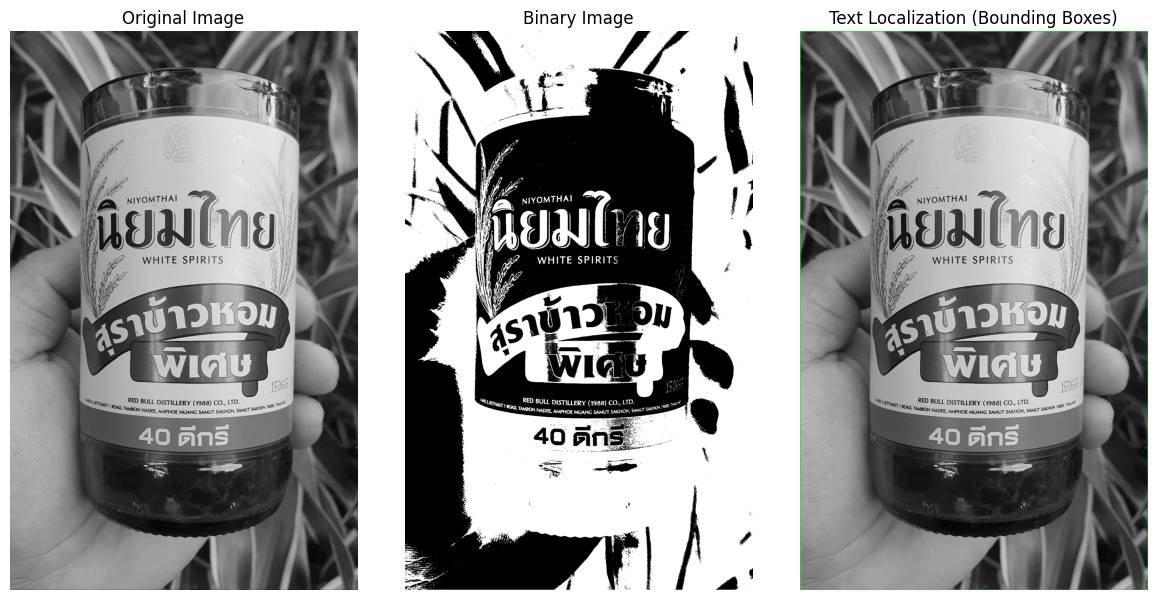

In [80]:
def text_localization_8_connect(image_path, binarization_threshold=128):
    # Create output directory
    output_dir = os.path.join("../Output/", image_path.split('/')[-1][:-4])
    os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

    # Step 1: Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Failed to load image. Check the path.")
        return []

    # Step 2: Binarize the image (assuming dark text on a light background)
    _, binary_image = cv2.threshold(image, binarization_threshold, 255, cv2.THRESH_BINARY_INV)

    # Step 3: Perform connected component labeling with 8-connectivity
    labeled_image = label(binary_image, connectivity=2)  # 2 for 8-connectivity

    # Step 4: Extract bounding boxes for each connected component
    regions = regionprops(labeled_image)
    bounding_boxes = [region.bbox for region in regions]

    # Step 5: Draw bounding boxes on the original image and save regions
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to RGB for visualization
    for i, bbox in enumerate(bounding_boxes):
        min_row, min_col, max_row, max_col = bbox
        area = (max_row - min_row) * (max_col - min_col)
        if area > 4000:  # Filter out small bounding boxes
            print(f"Saving region {i} with area {area}")
            # Draw bounding box on the original image
            cv2.rectangle(output_image, (min_col, min_row), (max_col, max_row), (0, 255, 0), 2)

            # Crop the region and save as a new image
            cropped_region = image[min_row:max_row, min_col:max_col]
            output_path = os.path.join(output_dir, f"region_{i}.png")
            print(f"Output path: {output_path}")
            if not cv2.imwrite(output_path, cropped_region):
                print(f"Failed to save {output_path}")
        # Step 6: Display the results
        plt.figure(figsize=(12, 6))
    
        # Original grayscale image
        plt.subplot(1, 3, 1)
        plt.title("Original Image")
        plt.imshow(image, cmap="gray")
        plt.axis("off")
    
        # Binary image
        plt.subplot(1, 3, 2)
        plt.title("Binary Image")
        plt.imshow(binary_image, cmap="gray")
        plt.axis("off")
    
        # Labeled image with bounding boxes
        plt.subplot(1, 3, 3)
        plt.title("Text Localization (Bounding Boxes)")
        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.axis("off")
    
        plt.tight_layout()
        plt.show()
    
        return bounding_boxes

# Example Usage
# image_path = "../Input-test/ขวด_สุราข้าวหอม3.jpg"  # Replace with your image path
# image_path = "../Input-test/ขวด_คริสตัล.png"  # Replace with your image path
# image_path = "../Input-test/Chang_beer.jpg"  # Replace with your image path
# image_path = "../Input-test/ขวด_รวงข้าว.png"  # Replace with your image path
image_path = "../Input-test/ขวด_สุราข้าวหอม3.jpg"  # Replace with your image path

# bounding_boxes = text_localization_8_connect(image_path, binarization_threshold=128)

# image
bounding_boxes = text_localization_8_connect(image_path, binarization_threshold=128)

# Print the bounding boxes
# print(f"Detected Bounding Boxes: {bounding_boxes}")


In [61]:
# path = "../Input-test/Chang_beer.jpg"
path = "../Input-test/6.jpg"
image = cv2.imread(path)
results = model(image)
print(f'result :  {len(results)}')
print("------------------------------------------------------------------")
# print(results)
print("------------------------------------------------------------------")
for i in range(len(results)): #total of picture
    print(f'|len : {len(results[i])}|')
    if len(results[i]) == 0:
           print(f'res : {results[i].boxes.data}')
    for box in results[i].boxes.data: # total of object in 1 picture
        print("Entry")
        x1, y1, x2, y2, conf, cls = map(float, box)
        name = results[i].names[cls]
        if name == "bottle":
            print(f'name : {name}')
            print(f'conf : {conf}')
        else :
            print(f'name : {name}')
            print(f'conf : {conf}')
            continue


0: 192x640 (no detections), 3.9ms
Speed: 9.5ms preprocess, 3.9ms inference, 0.3ms postprocess per image at shape (1, 3, 192, 640)
result :  1
------------------------------------------------------------------
------------------------------------------------------------------
|len : 0|
res : tensor([], device='cuda:0', size=(0, 6))
